In [1]:
from pycaret import regression
import pandas as pd
import numpy as np
import statistics
import math
# import mysql.connector
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pycaret.classification import *
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
import pycaret

print(f'pycaret  version: {pycaret.__version__}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
%config InlineBackend.figure_format = 'retina'

pycaret  version: 2.3.6
pandas  version: 1.4.1
numpy   version: 1.19.5
seaborn version: 0.11.2


In [2]:
df = pd.read_csv("pellet.csv")

In [3]:
all_data = pd.DataFrame(columns = list(df.columns.values.tolist()))
i = 1
time_v = 40
for a in range(len(df)-1):
  if i == 1:
    if ((df['c_formula'][a] == df['c_formula'][a+1]) and (df['n_feed_flowrate'][a] == df['n_feed_flowrate'][a+1])):
      i+=1
    else:
      i = 1

  elif i>1:
    if a==len(df)-1:
      if ((df['c_formula'][a] == df['c_formula'][a-1]) and (df['n_feed_flowrate'][a] == df['n_feed_flowrate'][a-1])):
        if i >= time_v+1:
          all_data = all_data.append(df[a-i+1:a+1])
          i = 2
        else:
          i = 2
      else:
        if i-1 >= time_v+1:
          all_data = all_data.append(df[a-i+1:a])
          i = 2
        else:
          i = 2
    else:
      if ((df['c_formula'][a] == df['c_formula'][a-1]) and (df['n_feed_flowrate'][a] == df['n_feed_flowrate'][a-1])):
        i+=1
      elif((df['c_formula'][a] == df['c_formula'][a+1]) and (df['n_feed_flowrate'][a] == df['n_feed_flowrate'][a+1])):
        if i-1 >=time_v+1:
          all_data = all_data.append(df[a-i+1:a])
          i = 2
        else:
          i = 2
      else:
        if i-1 >=time_v+1:
          all_data = all_data.append(df[a-i+1:a])
          i = 1
        else:
          i = 1

In [4]:
all_data = all_data[all_data['c_status'].isin(['RUN'])]
all_data['c_time'] = pd.to_datetime(all_data['c_time'])
all_data

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash
0,177452,BTG-LR3,RUN,2021-12-01 00:00:00,00:00.0,799,4,44.999,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,751.9,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,388,282,5.0,158,1.7,135,44,50,34.0,27.5,57.4,CONTROL BY TEMP,1,3,1.5,13.0,25,18.7,37,21.2,0,402,400,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,177453,BTG-LR3,RUN,2021-12-01 00:00:15,00:15.0,799,4,45.053,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,752.7,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,411,280,5.0,159,1.7,135,44,50,33.4,27.5,57.5,CONTROL BY TEMP,1,3,1.5,13.0,25,18.9,37,21.4,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,177454,BTG-LR3,RUN,2021-12-01 00:00:30,00:30.0,799,4,45.107,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,753.7,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,407,282,5.0,158,1.7,135,44,50,34.1,27.5,57.4,CONTROL BY TEMP,1,3,1.5,13.0,25,19.0,37,21.2,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,177455,BTG-LR3,RUN,2021-12-01 00:00:45,00:45.0,799,4,45.161,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,754.5,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,387,278,5.0,158,1.7,135,44,50,35.4,27.5,56.4,CONTROL BY TEMP,1,3,1.5,13.0,25,18.9,37,21.3,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,177456,BTG-LR3,RUN,2021-12-01 00:01:00,01:00.0,799,4,45.211,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,755.5,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,378,281,5.0,158,1.7,135,44,50,37.0,27.4,55.2,CONTROL BY TEMP,1,3,1.5,13.0,25,19.1,37,21.3,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [5]:
col  = 'c_formula'
conditions  = [(all_data[col] == '303I00000033') | (all_data[col] == '303I00000632') | (all_data[col] == '303I00000832') | (all_data[col] == '303I00000833')]
choices     = ['303I']
    
all_data['group'] = np.select(conditions, choices)
all_data

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
0,177452,BTG-LR3,RUN,2021-12-01 00:00:00,00:00.0,799,4,44.999,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,751.9,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,388,282,5.0,158,1.7,135,44,50,34.0,27.5,57.4,CONTROL BY TEMP,1,3,1.5,13.0,25,18.7,37,21.2,0,402,400,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,177453,BTG-LR3,RUN,2021-12-01 00:00:15,00:15.0,799,4,45.053,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,752.7,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,411,280,5.0,159,1.7,135,44,50,33.4,27.5,57.5,CONTROL BY TEMP,1,3,1.5,13.0,25,18.9,37,21.4,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,177454,BTG-LR3,RUN,2021-12-01 00:00:30,00:30.0,799,4,45.107,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,753.7,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,407,282,5.0,158,1.7,135,44,50,34.1,27.5,57.4,CONTROL BY TEMP,1,3,1.5,13.0,25,19.0,37,21.2,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,177455,BTG-LR3,RUN,2021-12-01 00:00:45,00:45.0,799,4,45.161,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,754.5,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,387,278,5.0,158,1.7,135,44,50,35.4,27.5,56.4,CONTROL BY TEMP,1,3,1.5,13.0,25,18.9,37,21.3,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,177456,BTG-LR3,RUN,2021-12-01 00:01:00,01:00.0,799,4,45.211,303GI0000129,12.9,40,0.51,65,65,79,65,65,0,755.5,ON,1.7,81,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,3.6,3.6,435,378,281,5.0,158,1.7,135,44,50,37.0,27.4,55.2,CONTROL BY TEMP,1,3,1.5,13.0,25,19.1,37,21.3,0,400,398,0.0,0.0,0,0,0.0,0.0,10,97.2,2.63,0,0,0,0,0,0,0,0,0,0,209004-6,4656887,94719.652,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [6]:
fn303I = all_data.loc[(all_data.group == '303I')]
fn303I

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
8522,194276,BTG-LR3,RUN,2021-12-03 23:59:45,59:45.0,816,4,19.157,303I00000832,13.3,46,0.46,68,68,78,68,67,0,145.0,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,368,368,4.8,157,1.6,135,49,50,31.3,24.4,51.9,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.2,37,21.9,0,399,397,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.0,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,NaN,108.0,1387.1,NaN,NaN,-0.2457,-0.039024,0.4393,0.7747,1.5139,NaN,0.1366,2.0048,NaN,NaN,11.41,16.21,4.0,2.69,NaN,303I
8523,194275,BTG-LR3,RUN,2021-12-03 23:59:30,59:30.0,816,4,19.094,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.5,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,371,370,4.8,158,1.6,135,49,50,30.8,24.4,53.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.0,37,21.9,0,399,400,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.0,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,NaN,108.0,1387.1,NaN,NaN,-0.2457,-0.039024,0.4393,0.7747,1.5139,NaN,0.1366,2.0048,NaN,NaN,11.41,16.21,4.0,2.69,NaN,303I
8524,194274,BTG-LR3,RUN,2021-12-03 23:59:15,59:15.0,816,4,19.039,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.1,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,380,375,4.8,158,1.6,135,49,50,29.9,24.6,54.3,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.9,0,400,397,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.0,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,NaN,108.0,1387.1,NaN,NaN,-0.2457,-0.039024,0.4393,0.7747,1.5139,NaN,0.1366,2.0048,NaN,NaN,11.41,16.21,4.0,2.69,NaN,303I
8525,194273,BTG-LR3,RUN,2021-12-03 23:59:00,59:00.0,816,4,18.983,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.6,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,362,372,4.8,158,1.6,135,49,50,30.3,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.7,0,400,399,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.0,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,NaN,108.0,1387.1,NaN,NaN,-0.2457,-0.039024,0.4393,0.7747,1.5139,NaN,0.1366,2.0048,NaN,NaN,11.41,16.21,4.0,2.69,NaN,303I
8526,194272,BTG-LR3,RUN,2021-12-03 23:58:45,58:45.0,816,4,18.928,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.2,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,367,372,4.8,158,1.6,135,49,50,31.8,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.5,37,21.9,0,401,399,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0

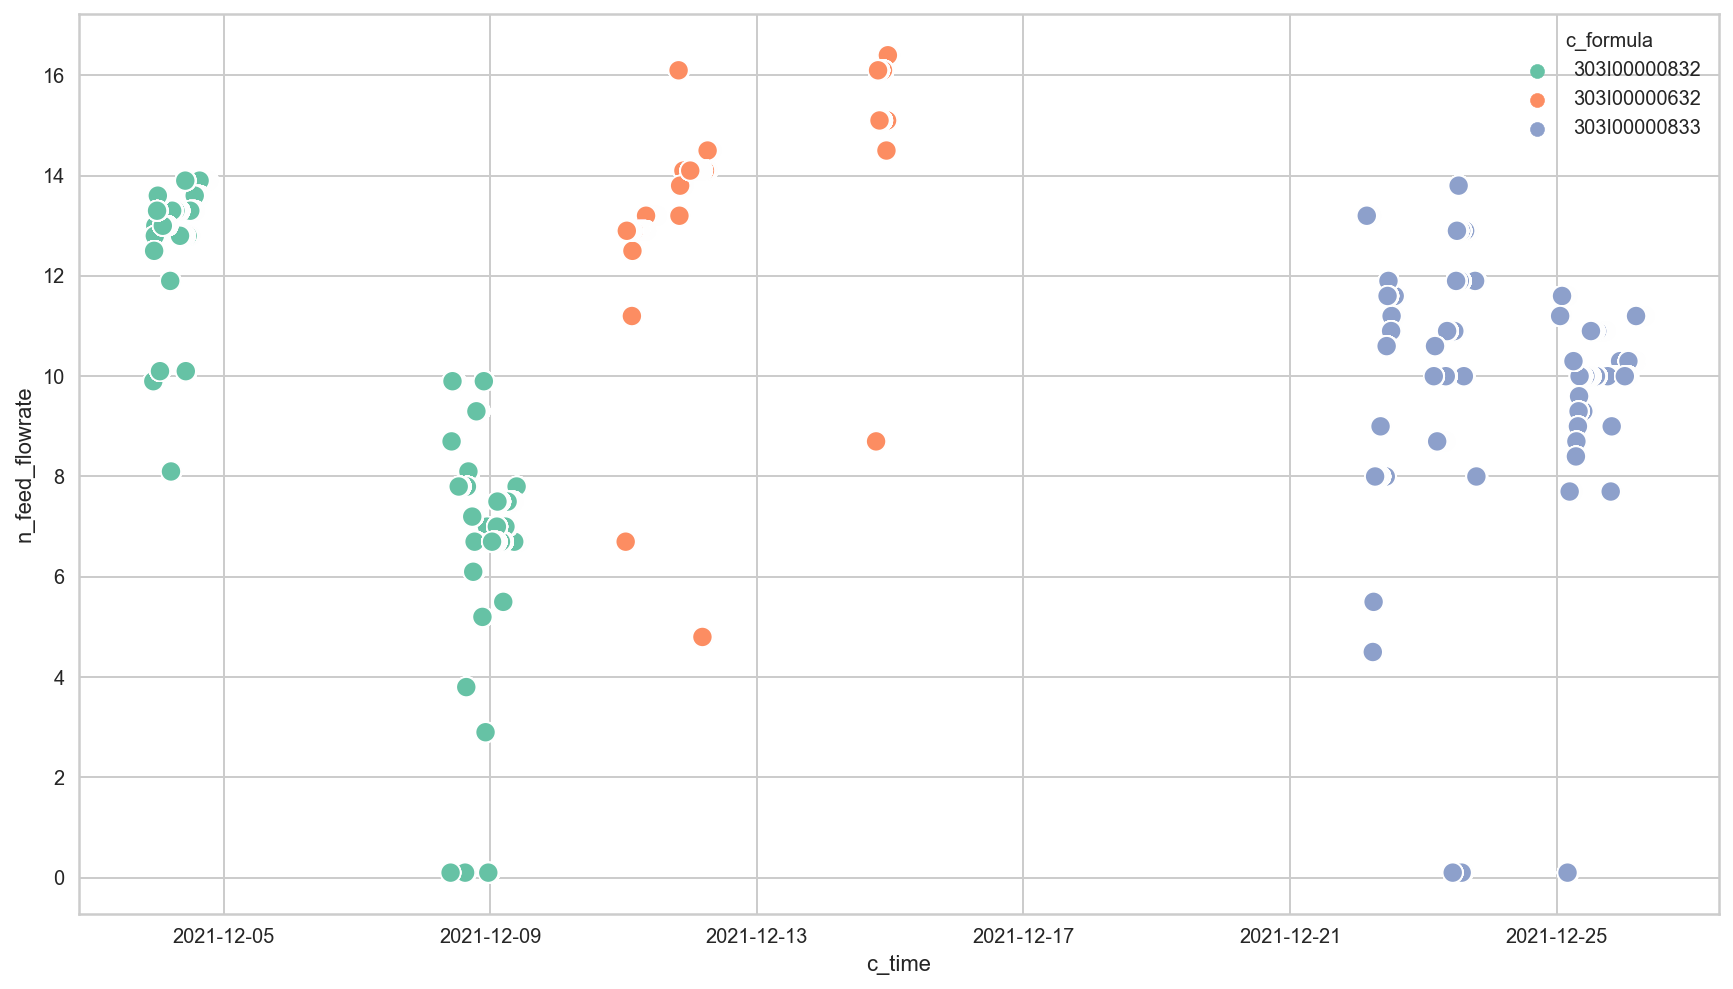

In [7]:
dims = (14.7, 8.27)
fig, ax = plt.subplots(figsize= dims)
sns.scatterplot(data = fn303I, x = "c_time", y = "n_feed_flowrate", hue="c_formula", palette="Set2", s=100)
plt.show()

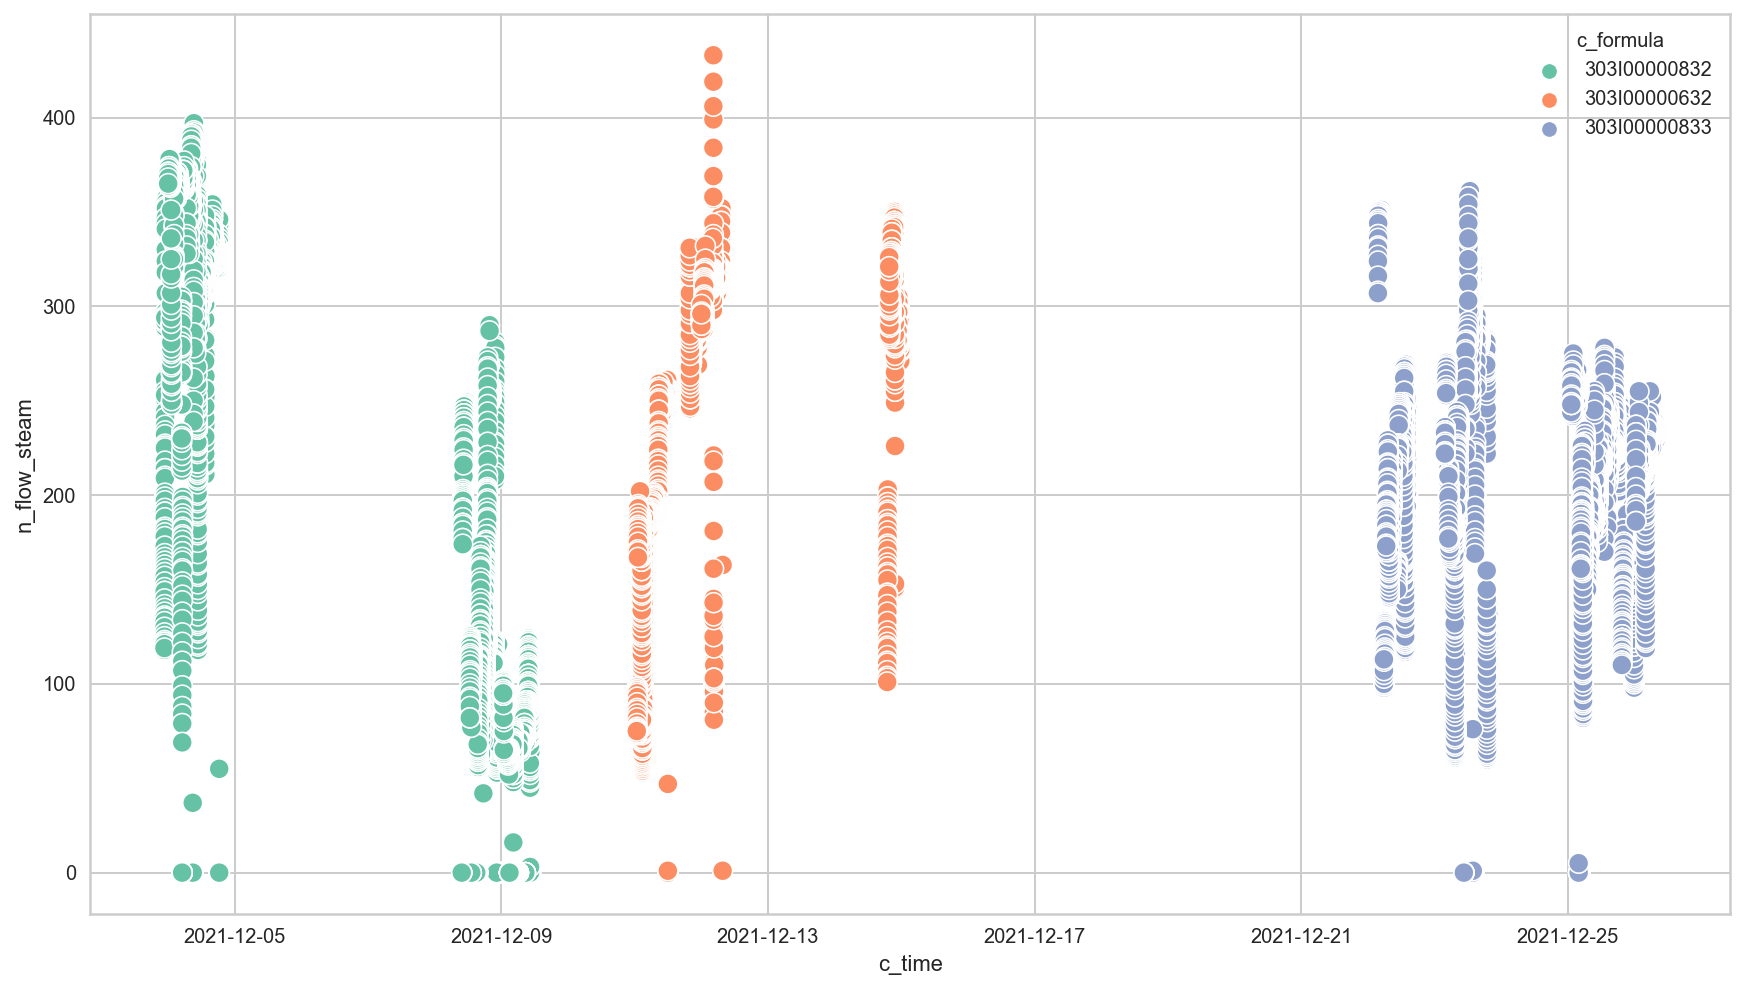

In [8]:
dims = (14.7, 8.27)
fig, ax = plt.subplots(figsize= dims)
sns.scatterplot(data = fn303I, x = "c_time", y = "n_flow_steam", hue="c_formula", palette="Set2", s=100)
plt.show()

In [9]:
fn303I.to_csv('df_pellet_lr.csv')

In [10]:
df30 = pd.read_csv("df_pellet_lr.csv")
df30

,Unnamed: 0,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group
0,8522,194276,BTG-LR3,RUN,2021-12-03 23:59:45,59:45.0,816,4,19.157,303I00000832,13.3,46,0.46,68,68,78,68,67,0,145.0,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,368,368,4.8,157,1.6,135,49,50,31.3,24.4,51.9,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.2,37,21.9,0,399,397,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,NaN,108.0,1387.1,NaN,NaN,-0.2457,-0.039024,0.4393,0.7747,1.5139,NaN,0.1366,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I
1,8523,194275,BTG-LR3,RUN,2021-12-03 23:59:30,59:30.0,816,4,19.094,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.5,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,371,370,4.8,158,1.6,135,49,50,30.8,24.4,53.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.0,37,21.9,0,399,400,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,NaN,108.0,1387.1,NaN,NaN,-0.2457,-0.039024,0.4393,0.7747,1.5139,NaN,0.1366,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I
2,8524,194274,BTG-LR3,RUN,2021-12-03 23:59:15,59:15.0,816,4,19.039,303I00000832,13.3,46,0.46,68,68,78,68,67,0,144.1,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,380,375,4.8,158,1.6,135,49,50,29.9,24.6,54.3,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.9,0,400,397,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,NaN,108.0,1387.1,NaN,NaN,-0.2457,-0.039024,0.4393,0.7747,1.5139,NaN,0.1366,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I
3,8525,194273,BTG-LR3,RUN,2021-12-03 23:59:00,59:00.0,816,4,18.983,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.6,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,362,372,4.8,158,1.6,135,49,50,30.3,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.3,37,21.7,0,400,399,0.0,0.0,0,0,0.0,0.0,10,96.6,NaN,0,0,0,0,0,0,0,0,0,0,209004-6,4873180,95382.224,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,3.00,1.0,2.0,60.0,50.0,12.5,4.5846,34.0,43.2,1215.79,1072.0,1675.9,NaN,108.0,1387.1,NaN,NaN,-0.2457,-0.039024,0.4393,0.7747,1.5139,NaN,0.1366,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I
4,8526,194272,BTG-LR3,RUN,2021-12-03 23:58:45,58:45.0,816,4,18.928,303I00000832,13.3,46,0.46,68,68,78,68,67,0,143.2,ON,0.8,46,V040600002,CRUDE PALM OIL (GRADE 2),CIRCULATE,1.8,1.8,435,367,372,4.8,158,1.6,135,49,50,31.8,24.6,54.4,STEAM FLOW CONTROL,1,4,1.8,13.4,25,21.5,37,21.9,0,401,399,0.0,0.0,0,0,0.

In [11]:
from pycaret.regression import *

In [12]:
reg1 = setup(data = df30, target = 'n_feed_flowrate',
             numeric_features = [
 'n_pv_temp1',
 'n_temp1',
 'n_temp2',
 'n_temp3',
 'n_total_lq1',
 'n_per_lq1',
 'n_rpm_lq1',
 'n_pv_lq1',
 'n_pv_amp_pl',
 'n_steam_pressure1',
 'n_steam_temp1',
 'n_steam_pressure2',
 'n_steam_temp2',
 'n_per_valve1',
 'n_max_valve1',
 'n_product_temp',
 'n_ambient_temp',
 'c_way_cooler',
 'n_min_feee_start',
 'n_early_target',
 'n_amp_cond1',
 'n_amp_cond2',
 'n_rsm_left',
 'n_rsm_right',
 'n_per_fine_fg',
 'n_die_hr',
 'n_die_meter',
 'FAT_add_Mixer',
 'FAT_add_die',
 'Die_Thickness_A',
 'LD_Ratio',
 'Usage-40',
 'Usage.-5',
 'Usage2',
 'Usage4',
 'Usage5',
 'Usage6',
 'Usage7',
 'Usage8',
 'Usage10',
 'Usage25',
 'GFPQF-40',
 'GFPQF.-5',
 'GFPQF2',
 'GFPQF4',
 'GFPQF5',
 'GFPQF6',
 'GFPQF7',
 'GFPQF8',
 'GFPQF10',
 'GFPQF25',
 'Moisture',
 'Protein',
 'FAT',
 'Fiber',
 'Ash',
 'FPQF'],
             normalize = True, normalize_method = 'zscore',
             ignore_features = ['n_flow_steam'],
             train_size=0.7,
             use_gpu=True,
             categorical_imputation='mode',
             remove_outliers = True)

,Description,Value
0,session_id,8367
1,Target,n_feed_flowrate
2,Original Data,"(23281, 120)"
3,Missing Values,1
4,Numeric Features,77
5,Categorical Features,40
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(15481, 365)"


In [13]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0009,0.0005,0.0179,0.9999,0.0016,0.0001,8.8270
rf,Random Forest Regressor,0.0012,0.0010,0.0247,0.9998,0.0021,0.0001,6.4740
lightgbm,Light Gradient Boosting Machine,0.0045,0.0011,0.0291,0.9998,0.0026,0.0005,1.3730
dt,Decision Tree Regressor,0.0008,0.0012,0.0246,0.9998,0.0020,0.0001,0.3140
br,Bayesian Ridge,0.0328,0.0023,0.0482,0.9996,0.0050,0.0033,0.7350
gbr,Gradient Boosting Regressor,0.0197,0.0023,0.0466,0.9996,0.0043,0.0020,10.3880
knn,K Neighbors Regressor,0.0052,0.0023,0.0458,0.9996,0.0048,0.0006,1.8390
omp,Orthogonal Matching Pursuit,0.0380,0.0027,0.0523,0.9996,0.0055,0.0038,0.0700
ridge,Ridge Regression,0.0330,0.0023,0.0482,0.9996,0.0050,0.0033,0.0580
lr,Linear Regression,0.0329,0.0023,0.0482,0.9996,0.0050,0.0033,0.2200


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8367, verbose=0, warm_start=False)

In [14]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0009,0.0002,0.0130,1.0000,0.0014,0.0001
1,0.0012,0.0005,0.0222,0.9999,0.0017,0.0001
2,0.0008,0.0001,0.0111,1.0000,0.0018,0.0001
3,0.0008,0.0001,0.0106,1.0000,0.0013,0.0001
4,0.0009,0.0003,0.0167,1.0000,0.0011,0.0001
5,0.0004,0.0000,0.0038,1.0000,0.0003,0.0000
6,0.0013,0.0005,0.0228,0.9999,0.0019,0.0001
7,0.0005,0.0001,0.0075,1.0000,0.0007,0.0000
8,0.0019,0.0031,0.0560,0.9995,0.0042,0.0002
9,0.0008,0.0002,0.0154,1.0000,0.0017,0.0001


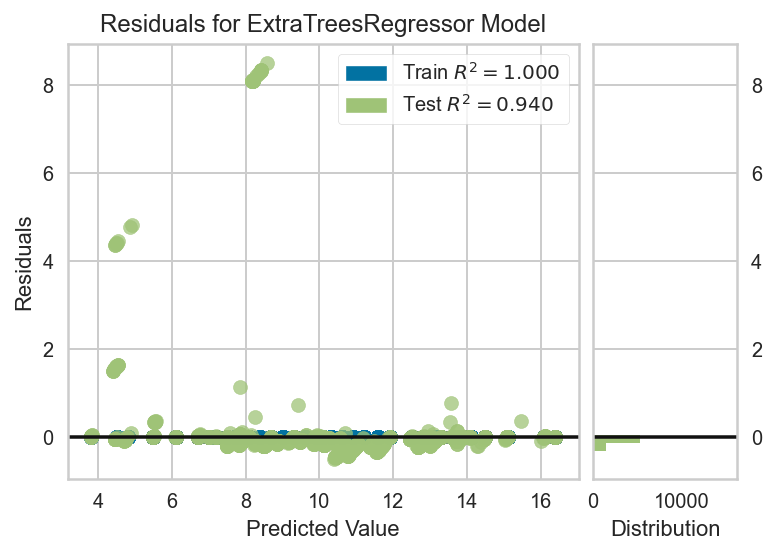

In [15]:
plot_model(model)

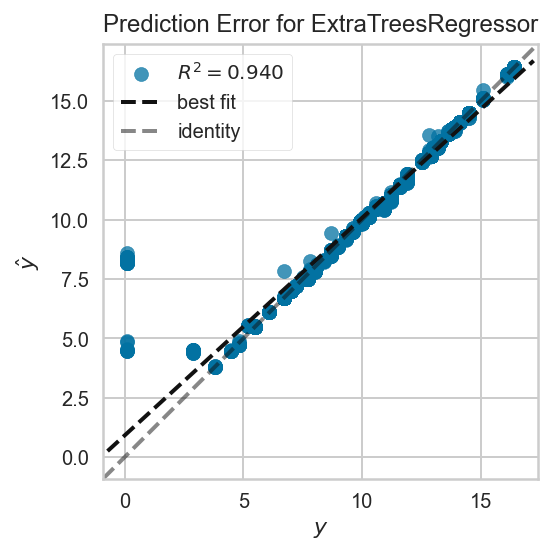

In [16]:
plot_model(model, plot = 'error')

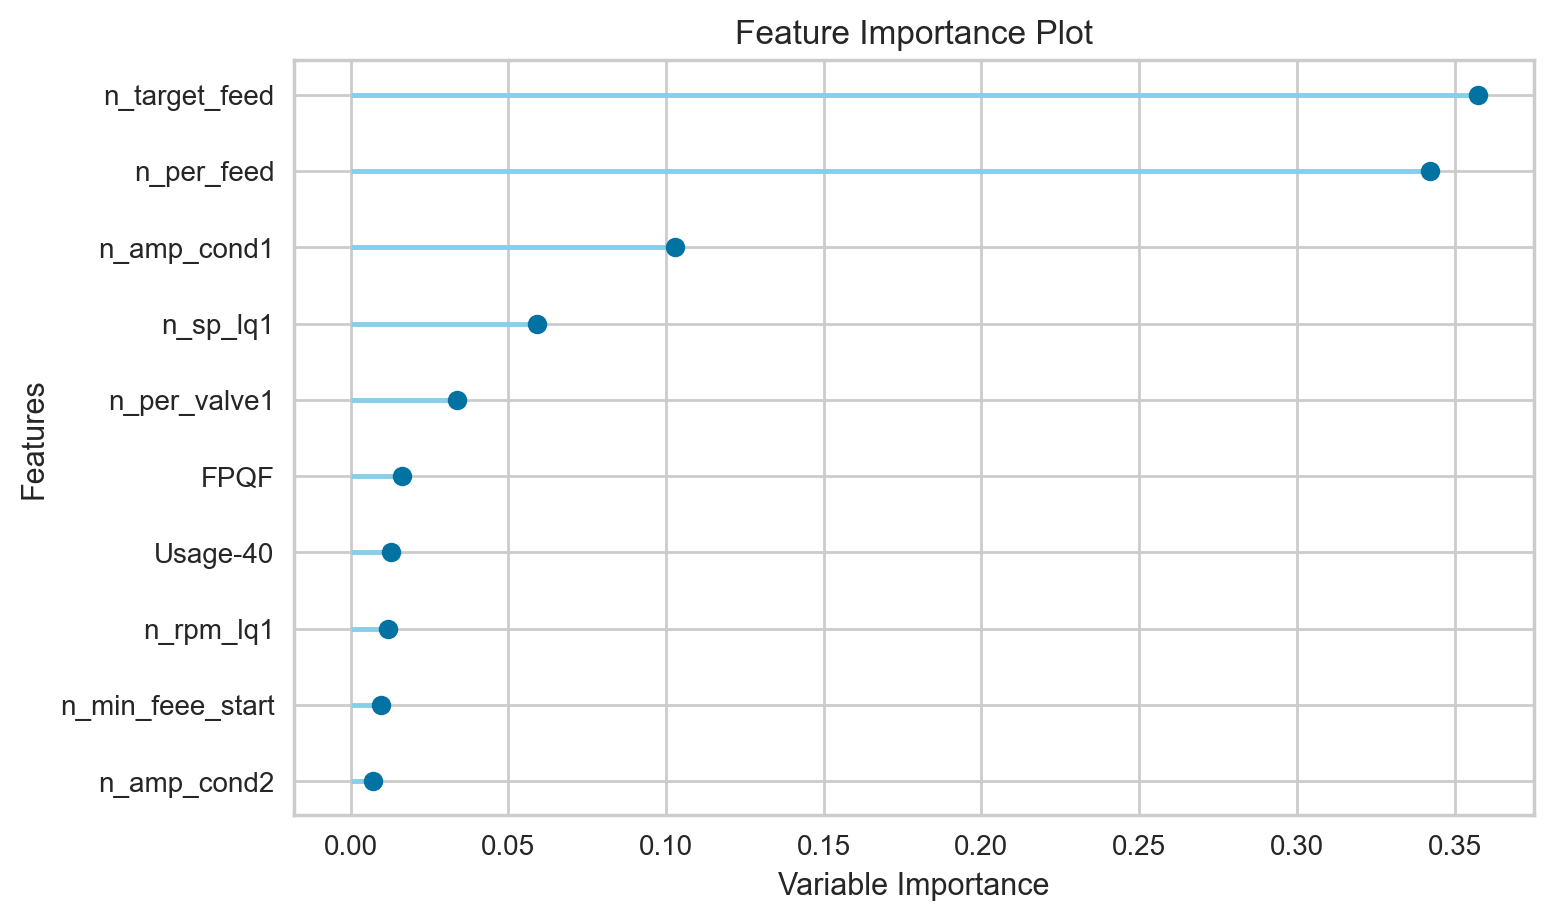

In [17]:
plot_model(model, plot='feature')

In [18]:
predictions = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1388,0.4605,0.6786,0.9403,0.1786,0.5726


In [19]:
save_model(model, '303I_lr3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['n_flow_steam'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['n_sp_temp1',
                                                           'n_pv_temp1',
                                                           'n_temp1', 'n_temp2',
                                                           'n_temp3',
                                                           'n_total_lq1',
                                                           'n_per_lq1',
                                                           'n_rpm_lq1',
                                                           'n_sp_lq1',
                                                           'n_pv_lq1',
                 

In [20]:
model_303I_lr3 = load_model('303I_lr3')

Transformation Pipeline and Model Successfully Loaded


In [21]:
test_data_classification = pd.read_csv('df_pellet_lr.csv')

predictions = regression.predict_model(model_303I_lr3, data=test_data_classification)
# view the predictions
predictions

,Unnamed: 0,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,...,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,group,Label
0,8522,194276,BTG-LR3,RUN,2021-12-03 23:59:45,59:45.0,816,4,19.157,303I00000832,...,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I,13.300
1,8523,194275,BTG-LR3,RUN,2021-12-03 23:59:30,59:30.0,816,4,19.094,303I00000832,...,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I,13.300
2,8524,194274,BTG-LR3,RUN,2021-12-03 23:59:15,59:15.0,816,4,19.039,303I00000832,...,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I,13.300
3,8525,194273,BTG-LR3,RUN,2021-12-03 23:59:00,59:00.0,816,4,18.983,303I00000832,...,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I,13.300
4,8526,194272,BTG-LR3,RUN,2021-12-03 23:58:45,58:45.0,816,4,18.928,303I00000832,...,2.0048,NaN,NaN,11.41,16.21,4.00,2.69,NaN,303I,13.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23276,135255,318150,BTG-LR3,RUN,2021-12-26 00:33:45,33:45.0,932,4,1.487,303I00000833,...,1.5624,NaN,NaN,11.50,16.21,4.26,2.62,6.61,303I,9.935
23277,135256,318149,BTG-LR3,RUN,2021-12-26 00:33:30,33:30.0,932,4,1.443,303I00000833,...,1.5624,NaN,NaN,11.50,16.21,4.26,2.62,6.61,303I,9.945
23278,135257,318148,BTG-LR3,RUN,2021-12-26 00:33:15,33:15.0,932,4,1.401,303I00000833,...,1.5624,NaN,NaN,11.50,16.21,4.26,2.62,6.61,303I,9.933
23279,135258,318147,BTG-LR3,RUN,2021-12-26 00:33:00,33:00.0,932,4,1.363,303I00000833,...,1.5624,NaN,NaN,11.50,16.21,4.26,2.62,6.61,303I,9.933


In [22]:
predictions[['n_total_feed','c_formula','n_per_feed','n_density','n_sp_temp1','n_pv_temp1','n_temp1'
             ,'n_temp1','n_temp2','n_temp3','n_total_lq1','c_fat_status','n_per_lq1','n_rpm_lq1'
             ,'c_lq1_code','c_lq1_name','c_3way_status','n_sp_lq1','n_pv_lq1','n_flow_steam','n_steam_pressure1'
             ,'n_steam_temp1','n_steam_pressure2','n_steam_temp2','n_per_valve1','n_max_valve1','n_product_temp'
             ,'n_ambient_temp','n_airout_temp','c_steam_mode','c_way_cooler','n_min_feee_start','n_early_target'
             ,'n_target_feed','n_amp_cond1','n_speed_cond1','n_amp_cond2','n_speed_cond2'
             ,'n_rsm_left','n_rsm_right','n_gap','n_sp_gap','n_kwhr_pl','n_kwhr_conveyor','n_per_fine_return'
             ,'n_flow_fine_return','n_max_fine_return','c_die_serial','n_die_hr','n_die_meter'
             ,'FPQF','n_feed_flowrate','Label']]

,n_total_feed,c_formula,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp1,n_temp2,n_temp3,...,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,c_die_serial,n_die_hr,n_die_meter,FPQF,n_feed_flowrate,Label
0,19.157,303I00000832,46,0.46,68,68,78,78,68,67,...,0,0.0,0.0,10,209004-6,4873180,95382.224,4.5846,13.3,13.300
1,19.094,303I00000832,46,0.46,68,68,78,78,68,67,...,0,0.0,0.0,10,209004-6,4873180,95382.224,4.5846,13.3,13.300
2,19.039,303I00000832,46,0.46,68,68,78,78,68,67,...,0,0.0,0.0,10,209004-6,4873180,95382.224,4.5846,13.3,13.300
3,18.983,303I00000832,46,0.46,68,68,78,78,68,67,...,0,0.0,0.0,10,209004-6,4873180,95382.224,4.5846,13.3,13.300
4,18.928,303I00000832,46,0.46,68,68,78,78,68,67,...,0,0.0,0.0,10,209004-6,4873180,95382.224,4.5846,13.3,13.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23276,1.487,303I00000833,31,0.51,63,61,69,69,61,62,...,0,0.0,0.0,10,209004-6,6236728,99477.470,4.2490,10.0,9.935
23277,1.443,303I00000833,31,0.51,63,61,69,69,61,62,...,0,0.0,0.0,10,209004-6,6236728,99477.470,4.2490,10.0,9.945
23278,1.401,303I00000833,31,0.51,63,61,68,68,61,62,...,0,0.0,0.0,10,209004-6,6236728,99477.470,4.2490,10.0,9.933
23279,1.363,303I00000833,31,0.51,63,61,68,68,61,62,...,0,0.0,0.0,10,209004-6,6236728,99477.470,4.2490,10.0,9.933
